### Implement Q-learning

In [22]:
import numpy as np
import matplotlib.pylab as plt

# Define the grid size and actions
grid_size = 10
n_actions = 4  # Actions: up, down, left, right
target    = (7,7)
pitfall   = (5,3)

# Initialize the Q-table with zeros
Q_table = np.zeros((grid_size, grid_size, n_actions))


alpha = 0.1  # Learning rate
gamma = 0.98  # Discount factor for future rewards
epsilon = 0.02  # Exploration rate for epsilon-greedy policy


# Reward matrix for the grid environment
rewards = np.full((grid_size, grid_size), -2)  # -1 for every state
rewards[7,6] = 2
rewards[8,7] = -6
rewards[target] = 100  # Goal state
rewards[pitfall] = -100  # Pitfall state


def epsilon_greedy_action(Q_table, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, n_actions)  # Explore: random action
    else:
        return np.argmax(Q_table[state])  # Exploit: action with highest Q-value


rewards

array([[  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2, -100,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,    2,  100,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -6,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2]])

In [23]:
# cumulative_rewards = []
# episode_lengths = []

# for episode in range(200):
#     state = np.random.randint(0, grid_size * grid_size)  # Start in a random state
#     done = False
#     total_reward = 0
#     steps = 0

#     while not done:
#         steps += 1
#         action = epsilon_greedy_action(Q_table, state, epsilon)

#         if action == 0:
#             next_state = state - 1
#         elif action == 1:
#             next_state = state + 1
#         elif action == 2:
#             next_state = state -10
#         elif action == 3:
#             next_state = state +10
#         else:
#             next_state = state

#         if next_state >= grid_size * grid_size:
#             next_state = state
#         if next_state < 0 : 
#             next_state = state

#         # print(state, action, next_state)

#         # next_state = np.random.randint(0, grid_size * grid_size)  # Simulated next state
#         reward = rewards[next_state]
#         total_reward += reward

#         # Update Q-value using Bellman equation
#         Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

#         state = next_state
#         if next_state == target or next_state == pitfall or steps > 200:
#             done = True
#             # print(steps)
#     episode_lengths.append(steps)
#     cumulative_rewards.append(total_reward)


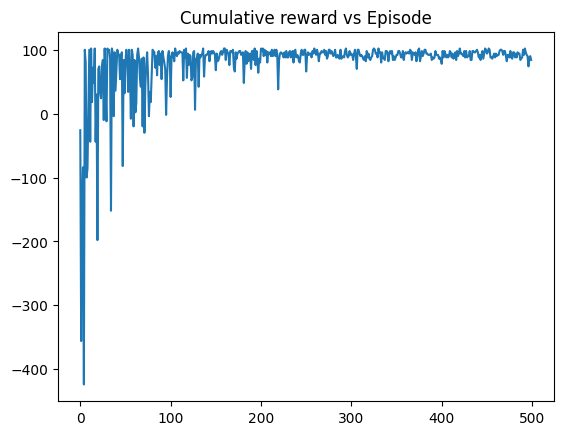

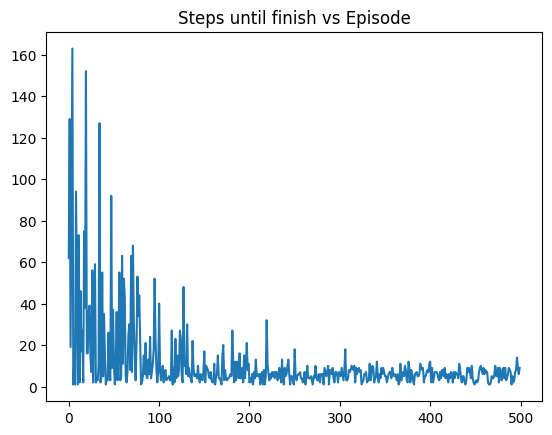

In [24]:
cumulative_rewards = []
episode_lengths = []
Q_table = np.zeros((grid_size, grid_size, n_actions))

for episode in range(500):
    state = (np.random.randint(0, grid_size), np.random.randint(0, grid_size))  # Start in a random state
    done = False
    total_reward = 0
    steps = 0

    while not done:
        steps += 1
        reward = 0
        action = int(epsilon_greedy_action(Q_table, state, epsilon))

        if action == 0: # Left
            if state[1]%grid_size != 0:
                next_state = (state[0], state[1] - 1)
            elif state[0] > 0:
                next_state = (state[0] - 1, grid_size - 1)
            else:
                next_state = (grid_size - 1, grid_size - 1)

        elif action == 1: # Right
            if state[1]%grid_size != grid_size - 1:
                next_state = (state[0], state[1] + 1)
            elif state[0] < grid_size - 1:
                next_state = (state[0] + 1, 0)
            else:
                next_state = (0, 0)

        elif action == 2 and state[0] > 0: # Up
            next_state = (state[0] - 1, state[1])

        elif action == 3 and state[0] < grid_size - 1: # Down
            next_state = (state[0] + 1, state[1])

        else: # blocked on the top or bottom borders
            next_state = state

        reward = rewards[next_state]
        total_reward += reward

        # Update Q-value using Bellman equation
        Q_table[state + (int(action),)] = Q_table[state + (int(action),)] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state + (int(action),)])

        state = next_state
        if next_state == target or next_state == pitfall or steps > 200:
            done = True
            # print(steps)
    episode_lengths.append(steps)
    cumulative_rewards.append(total_reward)


Q_table[target] = [0, 0, 0, 0]
Q_table[pitfall] = [0, 0, 0, 0]

plt.plot(cumulative_rewards)
plt.title("Cumulative reward vs Episode")
plt.show()
plt.plot(episode_lengths)
plt.title("Steps until finish vs Episode")
plt.show()

In [25]:
[Q_table.mean(), Q_table.max(), Q_table.min()]

[np.float64(9.425189131569983),
 np.float64(137.90086736261955),
 np.float64(-10.0)]

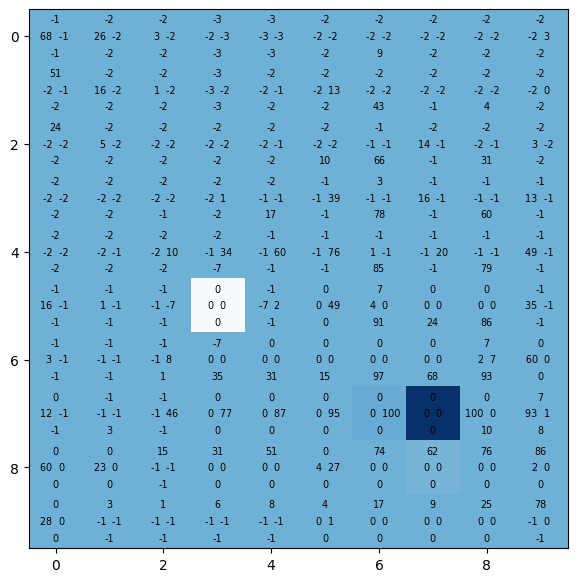

In [26]:
# Q_table2 = Q_table - Q_table.min()
Q_table2 = Q_table / Q_table.max() * 100

plt.figure(figsize=(7,7))
plt.imshow(rewards, cmap="Blues")
# LRUD
for j in range(grid_size):
    for i in range(grid_size):
        plt.text(j,i,f"{round(Q_table2[(i, j, 0)])} ", ha="right", va="center", size="x-small")
        plt.text(j,i,f" {round(Q_table2[(i, j, 1)])}", ha="left", va="center", size="x-small")
        plt.text(j,i,f"{round(Q_table2[(i, j, 2)])}\n", ha="center", va="bottom", size="x-small")
        plt.text(j,i,f"\n{round(Q_table2[(i, j, 3)])}", ha="center", va="top", size="x-small")
plt.show()

### Implement policy gradients

In [3]:
import tensorflow as tf
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# Define the policy network
grid_size = 10
n_states = grid_size * grid_size  # Number of states in the grid
n_actions = 4  # Up, down, left, right
target    = 77
pitfall   = 53

# Reward matrix for the grid environment
rewards = np.full(grid_size * grid_size, -2)  # -1 for every state
rewards[target] = 100  # Goal state
rewards[pitfall] = -100  # Pitfall state

model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, activation='relu', input_shape=(n_states,)),
    tf.keras.layers.Dense(n_actions, activation='softmax')  # Output action probabilities
])

# Optimizer for policy network updates
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

In [4]:
def get_action(state):
    state_input = tf.one_hot(state, n_states)  # One-hot encoding for state
    action_probs = model(state_input[np.newaxis, :])
    return np.random.choice(n_actions, p=action_probs.numpy()[0])

In [5]:
# Simulation loop
states = []
actions = []
episode_rewards = []  

for episode in range(200):
    state = np.random.randint(0, n_states)  # Start in a random state
    done = False
    step = 0
    while not done:
        step += 1
        action = get_action(state)  # Use the provided function

        tstate = (state//grid_size, state%grid_size)
        if action == 0: # Left
            if tstate[1]%grid_size != 0:
                next_state = (tstate[0], tstate[1] - 1)
            elif tstate[0] > 0:
                next_state = (tstate[0] - 1, grid_size - 1)
            else:
                next_state = (grid_size - 1, grid_size - 1)

        elif action == 1: # Right
            if tstate[1]%grid_size != grid_size - 1:
                next_state = (tstate[0], tstate[1] + 1)
            elif tstate[0] < grid_size - 1:
                next_state = (tstate[0] + 1, 0)
            else:
                next_state = (0, 0)

        elif action == 2 and tstate[0] > 0: # Up
            next_state = (tstate[0] - 1, tstate[1])

        elif action == 3 and tstate[0] < grid_size - 1: # Down
            next_state = (tstate[0] + 1, tstate[1])

        else: # blocked on the top or bottom borders
            next_state = tstate

        next_state = next_state[0] * grid_size + next_state[1] - 1
        # next_state = np.random.randint(0, n_states)  # Simulated next state
        reward = rewards[next_state]  

        # Store the state-action-reward trajectory
        states.append(state)
        actions.append(action)
        episode_rewards.append(reward)  

        state = next_state
        if next_state in {target, pitfall} or step > 50:  
            done = True

In [6]:
def compute_cumulative_rewards(rewards, gamma=0.99):
    cumulative_rewards = np.zeros_like(rewards)
    running_add = 0
    for t in reversed(range(len(rewards))):
        running_add = running_add * gamma + rewards[t]
        cumulative_rewards[t] = running_add
    return cumulative_rewards

In [7]:
def update_policy(states, actions, rewards):
    cumulative_rewards = compute_cumulative_rewards(rewards)

    with tf.GradientTape() as tape:
        state_inputs = tf.one_hot(states, n_states)  # Convert states to one-hot encoding
        action_probs = model(state_inputs)
        action_masks = tf.one_hot(actions, n_actions)  # Mask for selected actions
        log_probs = tf.reduce_sum(action_masks * tf.math.log(action_probs), axis=1)

        # Policy loss is the negative log-probability of the action times the cumulative reward
        loss = -tf.reduce_mean(log_probs * cumulative_rewards)

    # Apply gradients to update the policy network
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

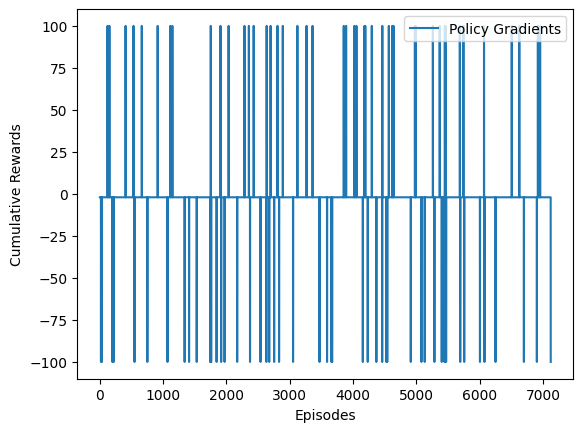

In [8]:
import matplotlib.pyplot as plt

# Example code to visualize rewards over episodes
# plt.plot(rewards_q_learning, label='Q-Learning')
# plt.plot(rewards_policy_gradients, label='Policy Gradients')
plt.plot(episode_rewards, label='Policy Gradients')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Rewards')
plt.legend()
plt.show()

### Reinforcement learning: Training an AI agent to play tic-tac-toe

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize the Q-table
Q = {}

# Define the Tic-Tac-Toe board
def initialize_board():
    return np.zeros((3, 3), dtype=int)

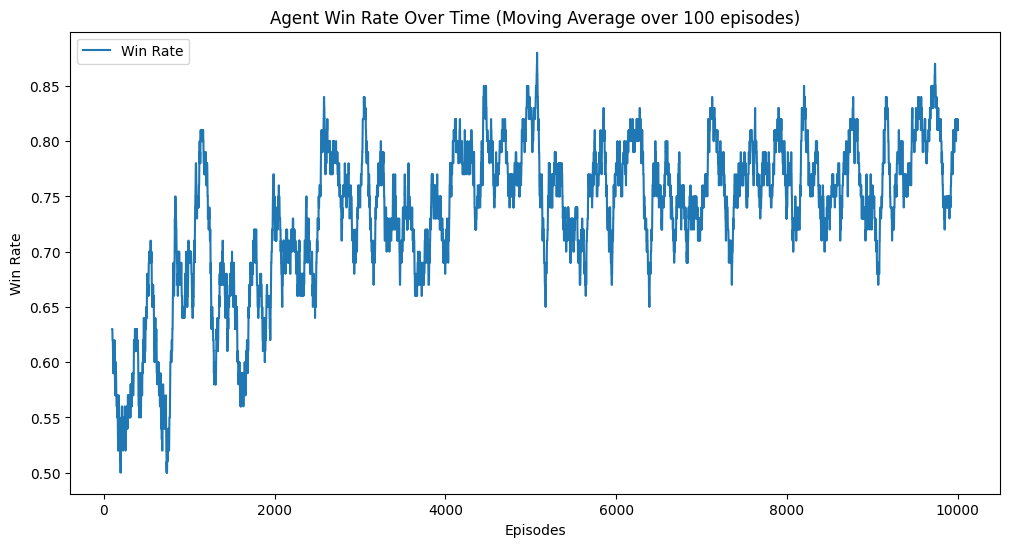

In [12]:
# Check for a win
def check_win(board, player):
    for i in range(3):
        if np.all(board[i, :] == player) or np.all(board[:, i] == player):
            return True
    if board[0, 0] == board[1, 1] == board[2, 2] == player or board[0, 2] == board[1, 1] == board[2, 0] == player:
        return True
    return False

# Check for a draw
def check_draw(board):
    return not np.any(board == 0)

# Get available actions
def get_available_actions(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i, j] == 0]

# Choose an action using epsilon-greedy policy
def choose_action(state, board, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(get_available_actions(board))
    else:
        if state in Q and Q[state]:
            # Choose the action with the maximum Q-value
            return max(Q[state], key=Q[state].get)
        else:
            # No action in Q-table, choose random
            return random.choice(get_available_actions(board))

# Update Q-value
def update_q_value(state, action, reward, next_state, alpha, gamma):
    max_future_q = max(Q.get(next_state, {}).values(), default=0)
    current_q = Q.get(state, {}).get(action, 0)
    new_q = current_q + alpha * (reward + gamma * max_future_q - current_q)
    if state not in Q:
        Q[state] = {}
    Q[state][action] = new_q

# Convert board to a tuple (hashable type)
def board_to_tuple(board):
    return tuple(map(tuple, board))

# Train the agent
def train(episodes, alpha=0.1, gamma=0.9, epsilon=0.1):
    win_history = []
    for episode in range(episodes):
        board = initialize_board()
        state = board_to_tuple(board)
        done = False
        result = None  # Initialize result
        while not done:
            action = choose_action(state, board, epsilon)
            board[action[0], action[1]] = 1
            next_state = board_to_tuple(board)
            if check_win(board, 1):
                update_q_value(state, action, 1, next_state, alpha, gamma)
                result = 1  # Agent won
                done = True
            elif check_draw(board):
                update_q_value(state, action, 0.5, next_state, alpha, gamma)
                result = 0  # Draw
                done = True
            else:
                opponent_action = random.choice(get_available_actions(board))
                board[opponent_action[0], opponent_action[1]] = -1
                next_state = board_to_tuple(board)
                if check_win(board, -1):
                    update_q_value(state, action, -1, next_state, alpha, gamma)
                    result = -1  # Agent lost
                    done = True
                elif check_draw(board):
                    update_q_value(state, action, 0.5, next_state, alpha, gamma)
                    result = 0  # Draw
                    done = True
                else:
                    update_q_value(state, action, 0, next_state, alpha, gamma)
            state = next_state
        # Record the result
        if result == 1:
            win_history.append(1)
        else:
            win_history.append(0)
    return win_history

Q = {}

# Train the agent for 10000 episodes
win_history = train(10000)

# Calculate the moving average of win rate
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# Set the window size for the moving average
window_size = 100

# Compute the moving average
win_rate = moving_average(win_history, window_size)

# Generate episodes for plotting
episodes = np.arange(window_size, len(win_history) + 1)

# Plot the win rate over time
plt.figure(figsize=(12,6))
plt.plot(episodes, win_rate, label='Win Rate')
plt.xlabel('Episodes')
plt.ylabel('Win Rate')
plt.title('Agent Win Rate Over Time (Moving Average over {} episodes)'.format(window_size))
plt.legend()
plt.show()